# 1 layer model validation

In [3]:
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

os.environ['DISPLAY'] = 'localhost:10.0'
os.chdir('/home/ishan/honors_thesis/scripts')
from scripts import dlc_rnn, utils

from sklearn.metrics import mean_squared_error
from sklearn.externals.joblib import load

file = '/home/ishan/honors_thesis/github/models/fly_1layer_128Units_32Batchsize_Stateful_Model_0.hdf5'
model = dlc_rnn.LSTM2Dense1(mpath = file, gputouse=2)
np.random.seed(1)
#model.export_predictions
#mo
num_angles=30

Instructions for updating:
Use tf.cast instead.


In [4]:
Xtrain = h5py.File('/home/ishan/honors_thesis/validation_set/Xtrain.h5')['joint_angles']
Ytrain = h5py.File('/home/ishan/honors_thesis/validation_set/Ytrain.h5')['joint_angles']
preds = model.model.predict(Xtrain, batch_size=32, verbose=1)

80000/80000 [==============================] - 13s 161us/step


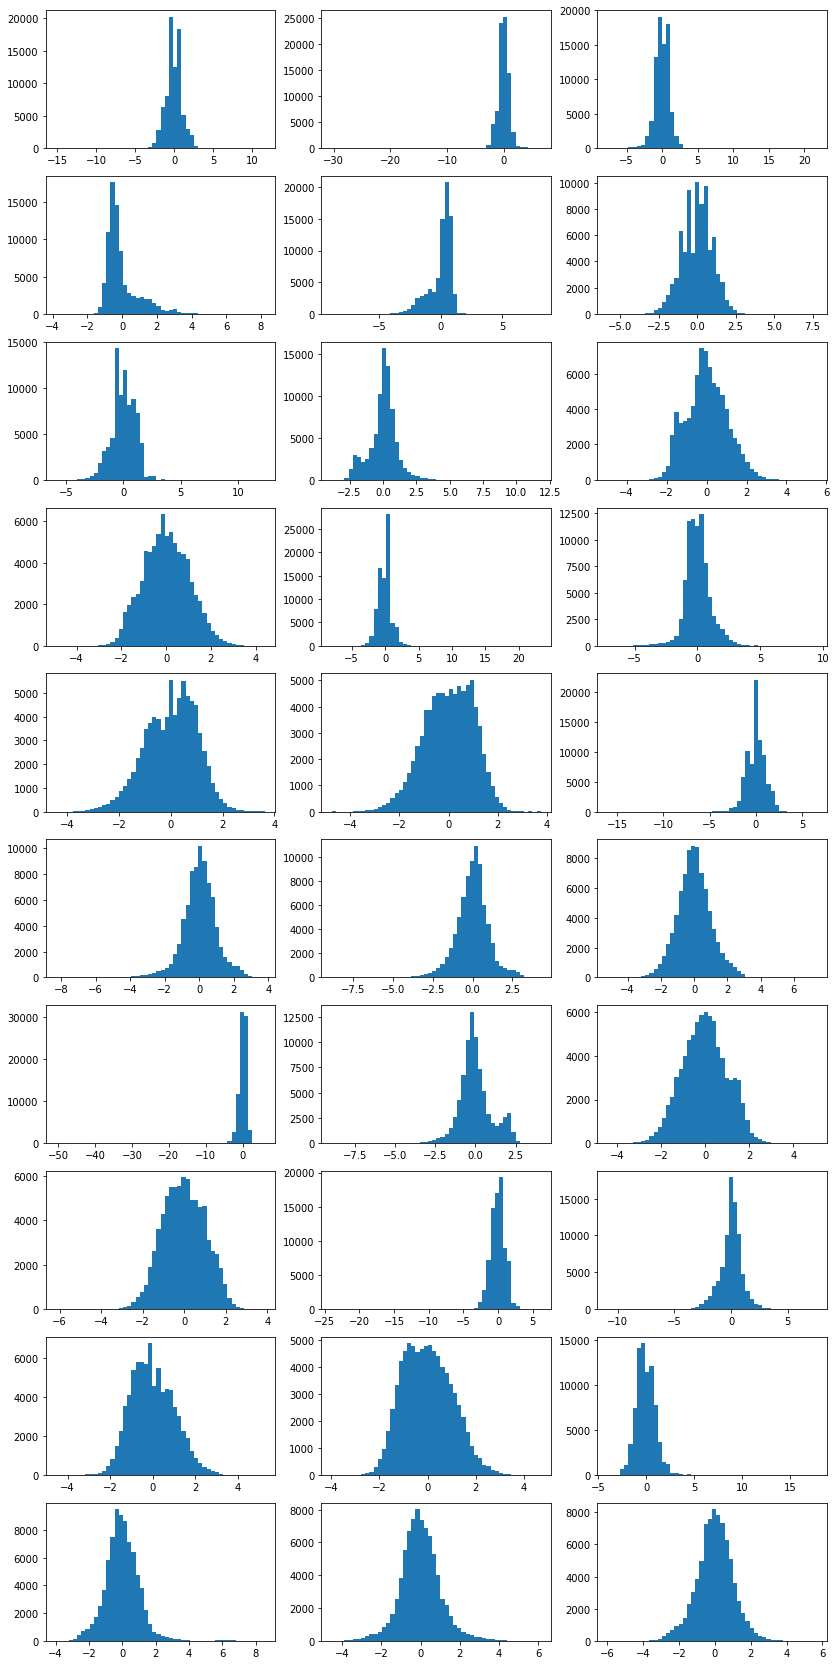

In [5]:
fig, axes = plt.subplots(10,3, figsize=(14,30))
for ang in range(num_angles):
    ax = axes[ang//3][ang%3]
    ax.hist(Xtrain[:,0,ang], bins=50)

-0.002336621658164328 -0.0005222098705094104


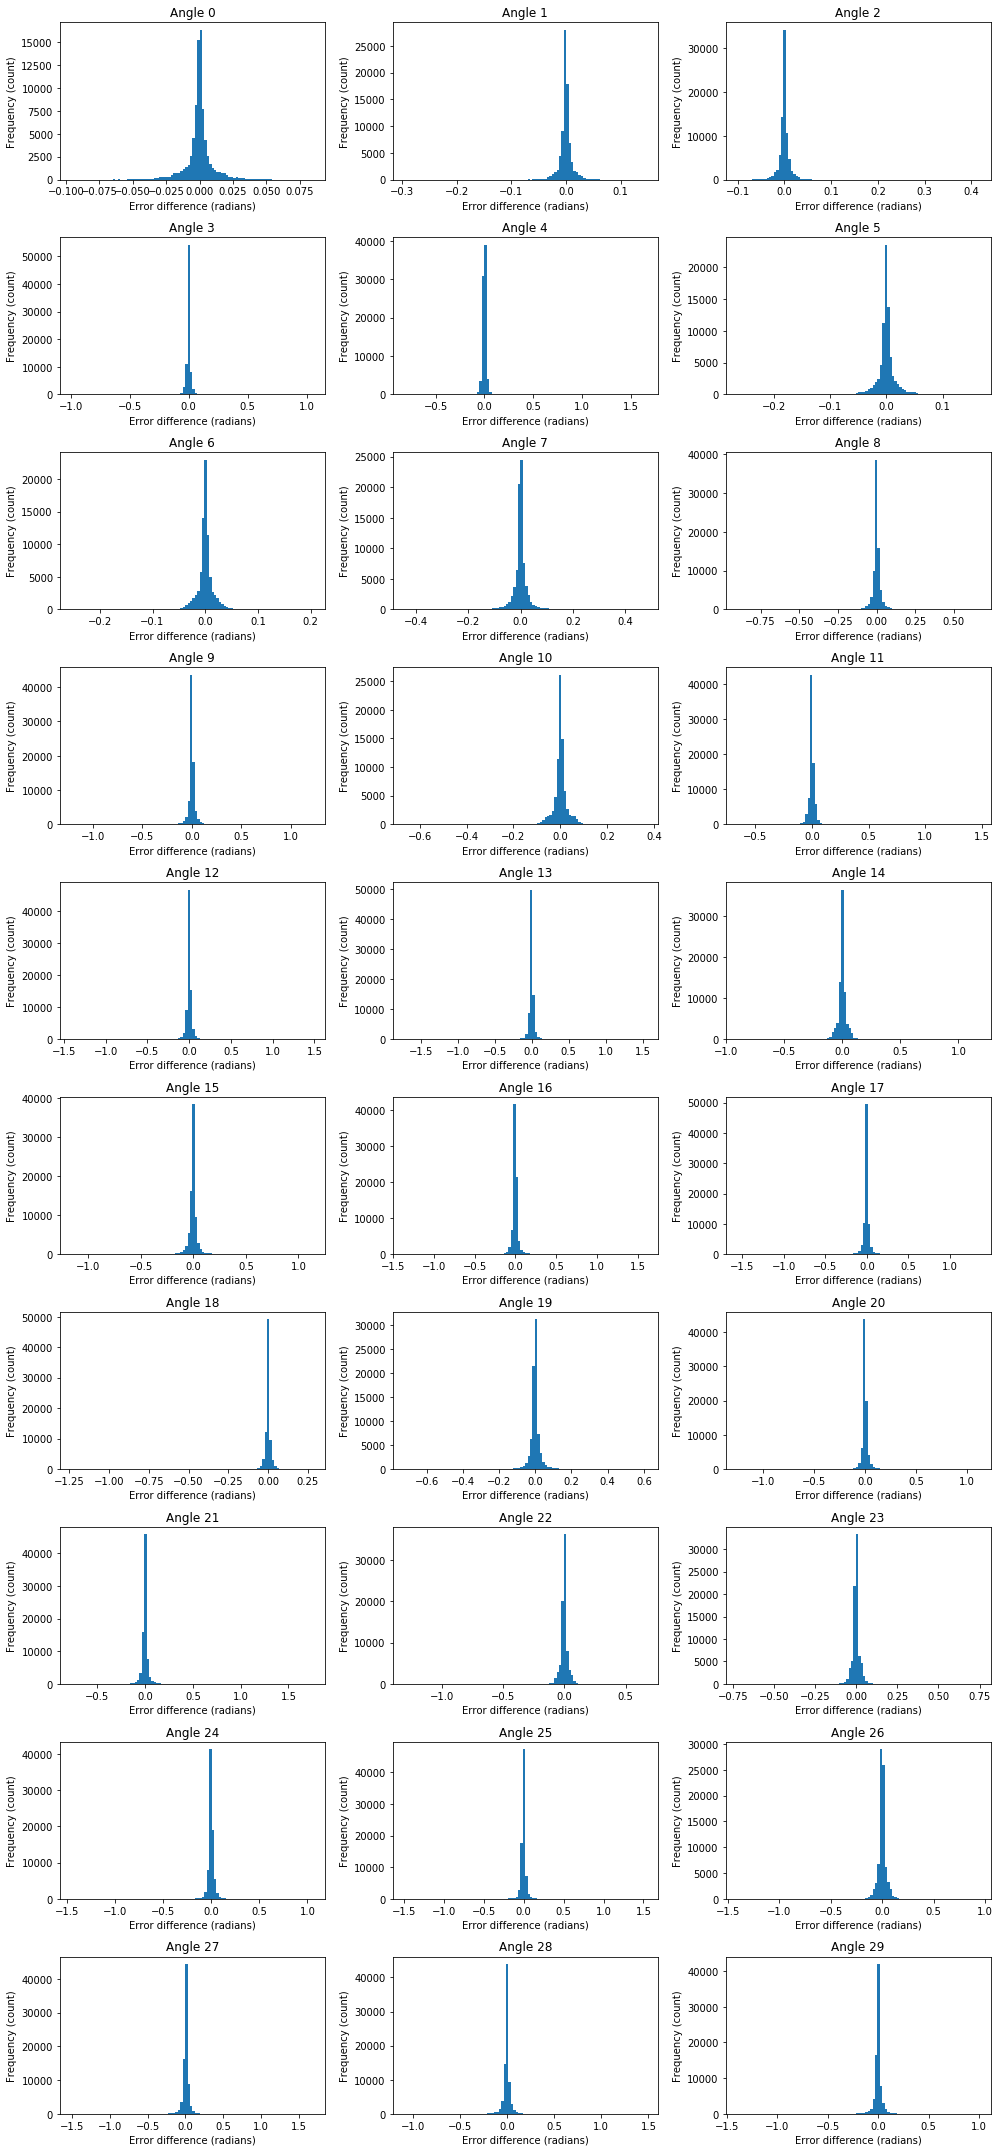

In [6]:
os.chdir('/home/ishan/honors_thesis/')
Xscaler = load('Xscaler_val.bin')
Yscaler = load('Yscaler_val.bin')

preds_unnormed = Yscaler.inverse_transform(preds)
Y_unnormed = Yscaler.inverse_transform(Ytrain)
print((preds - Ytrain).mean(), (preds_unnormed-Y_unnormed).mean())
diff = (preds_unnormed[:,-1,:] - Y_unnormed[:,-1,:])
mean_diff = diff.mean(axis=1)

fig, axes = plt.subplots(10,3, figsize=(14,30))
for ang in range(num_angles):
    ax = axes[ang//3][ang%3]
    ax.hist(diff[:,ang], bins=100)
    ax.set_title('Angle {}'.format(ang))
    ax.set_ylabel('Frequency (count)')
    ax.set_xlabel('Error difference (radians)')
fig.tight_layout()
#fig.savefig('Model Error Distribution[1layer].png')

In [7]:
mean_squared_error(preds_unnormed[:,-1,:], Y_unnormed[:,-1,:])

0.0015367789295892486

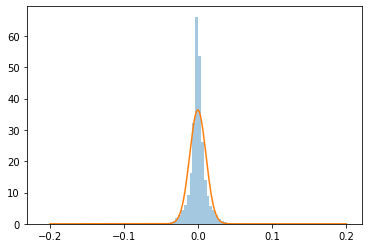

In [8]:
import seaborn as sns
from scipy import stats

x = np.linspace(-0.2,0.2,1000)
fit = stats.norm.fit(mean_diff)
fig, ax = plt.subplots()
ax = sns.distplot(mean_diff, kde=False,norm_hist=True,bins=100, label='Values');
ax.plot(x, stats.norm.pdf(x, *fit), label='Gaussian fit')

0.010059494509334539


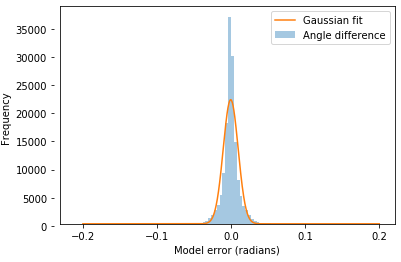

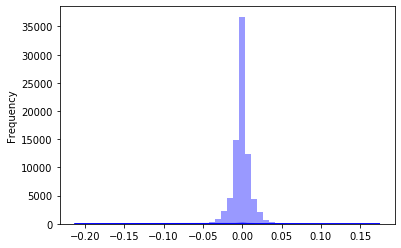

In [9]:
import seaborn as sns
from scipy import stats
fit = stats.norm.fit(np.clip(mean_diff, -0.03, 0.03))
fig, ax = plt.subplots()
ax = sns.distplot(mean_diff, kde=False,norm_hist=True,bins=100, label='Angle difference');
ax.plot(x, stats.norm.pdf(x, *fit), label='Gaussian fit')
ax.legend() #awesome - fit[0] corresponds to mean and fit[1] correponds to sigma
ax.set_xlabel('Model error (radians)')
fig2, ax2 = plt.subplots()
sns.distplot(mean_diff, color='b');
sns.distplot(mean_diff, ax=ax2, kde=False, norm_hist=False, color='b');
ax.yaxis = ax2.yaxis
ax.set_ylabel('Frequency')
print(fit[1])

In [10]:
fit

(-0.000518766919880321, 0.010059494509334539)

In [182]:
fig.savefig('RNN1_error.png')

# 2 layer model validation

In [1]:
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt

os.environ['DISPLAY'] = 'localhost:10.0'
os.chdir('/home/ishan/honors_thesis/scripts')
from scripts import dlc_rnn, utils

from sklearn.metrics import mean_squared_error
from sklearn.externals.joblib import load

file = '/home/ishan/honors_thesis/github/models/fly_2layer_64Units_32Batchsize_Stateful_Model_0.hdf5'
model = dlc_rnn.LSTM2Dense1(mpath = file, gputouse=2)
np.random.seed(1)
#model.export_predictions
#mo
num_angles=30

Using TensorFlow backend.
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflo

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [2]:
Xtrain = h5py.File('/home/ishan/honors_thesis/validation_set/Xtrain.h5')['joint_angles']
Ytrain = h5py.File('/home/ishan/honors_thesis/validation_set/Ytrain.h5')['joint_angles']
preds = model.model.predict(Xtrain, batch_size=32, verbose=1)

80000/80000 [==============================] - 19s 231us/step


-0.0048113710097317415 -0.0006926056291256926


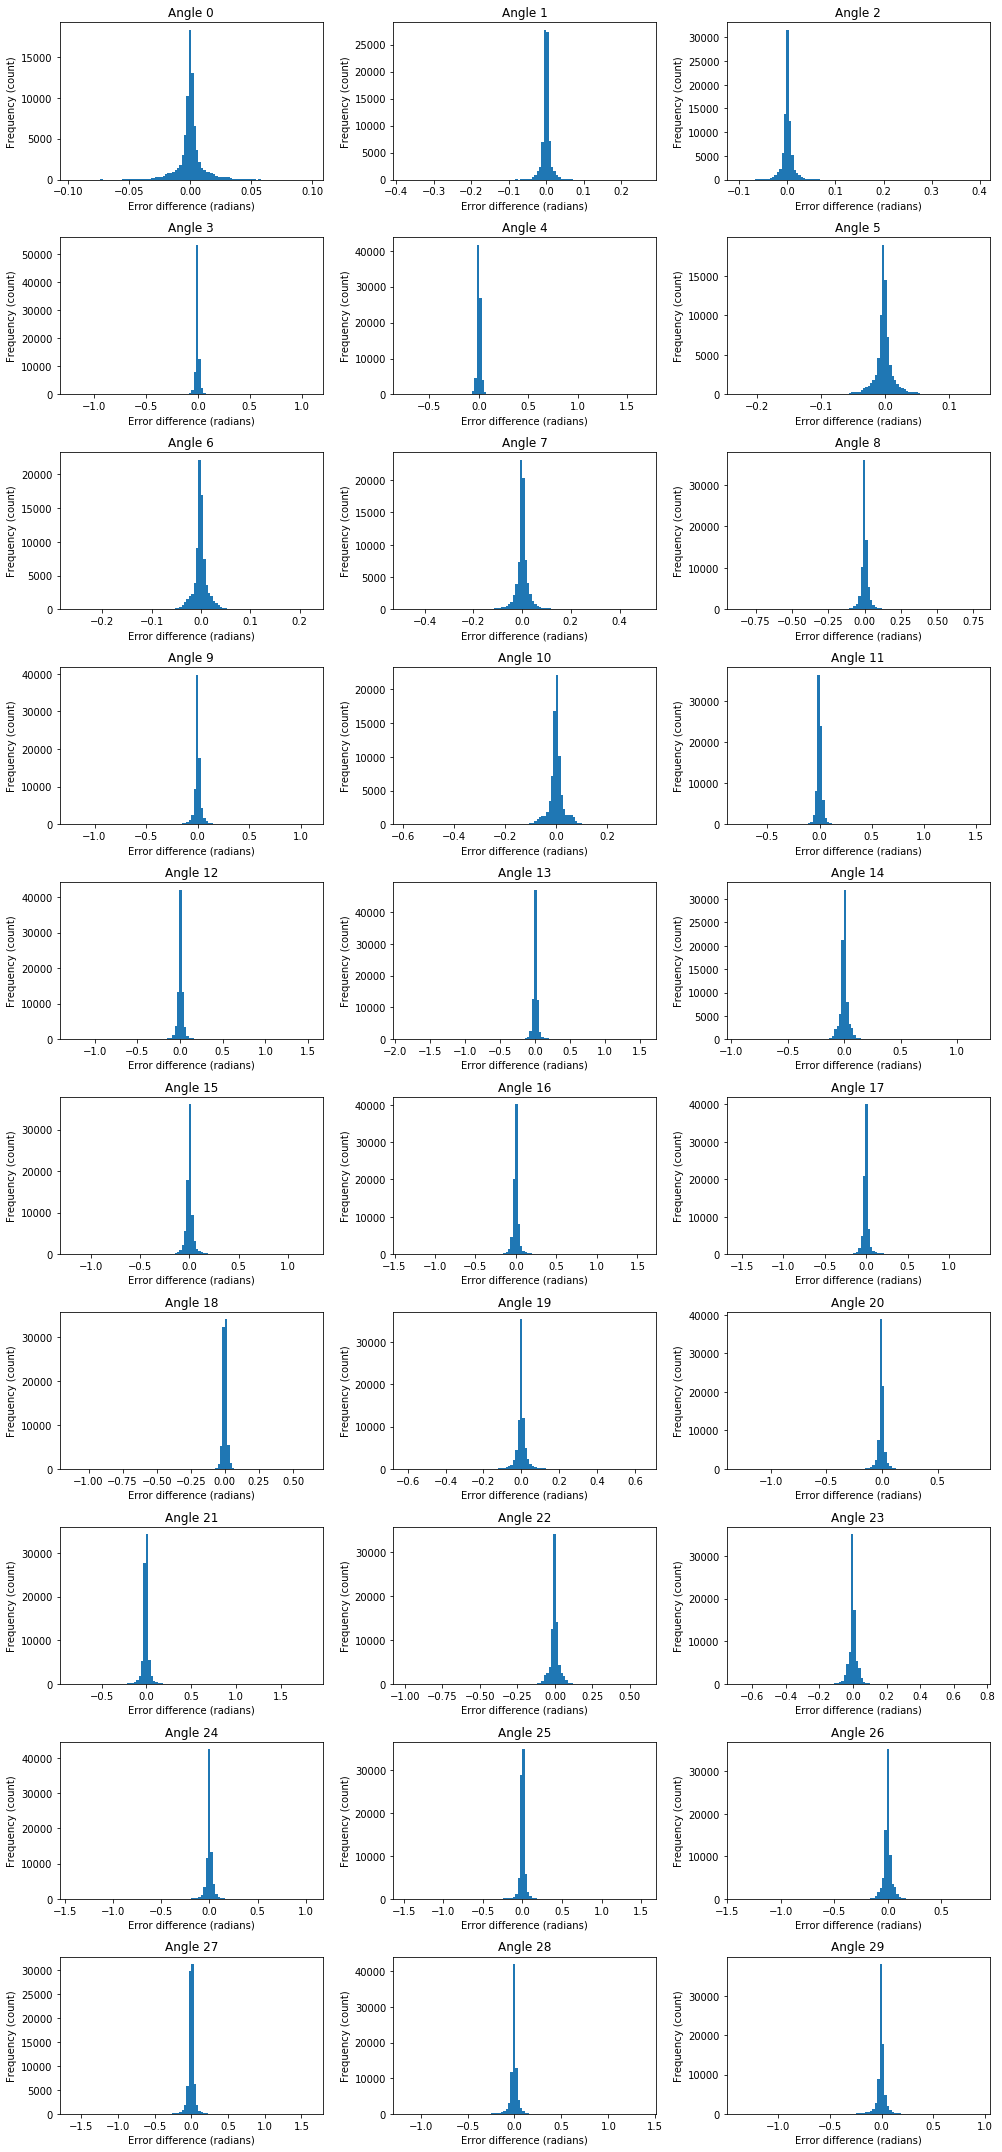

In [3]:
os.chdir('/home/ishan/honors_thesis/')
Xscaler = load('Xscaler_val.bin')
Yscaler = load('Yscaler_val.bin')

preds_unnormed = Yscaler.inverse_transform(preds)
Y_unnormed = Yscaler.inverse_transform(Ytrain)
print((preds - Ytrain).mean(), (preds_unnormed-Y_unnormed).mean())
diff = (preds_unnormed[:,-1,:] - Y_unnormed[:,-1,:])
mean_diff = diff.mean(axis=1)

fig, axes = plt.subplots(10,3, figsize=(14,30))
for ang in range(num_angles):
    ax = axes[ang//3][ang%3]
    ax.hist(diff[:,ang], bins=100)
    ax.set_title('Angle {}'.format(ang))
    ax.set_ylabel('Frequency (count)')
    ax.set_xlabel('Error difference (radians)')
fig.tight_layout()
#fig.savefig('Model Error Distribution[1layer].png')

In [4]:
mean_squared_error(preds_unnormed[:,-1,:], Y_unnormed[:,-1,:])

0.0016883864750001734

0.010533873057356933


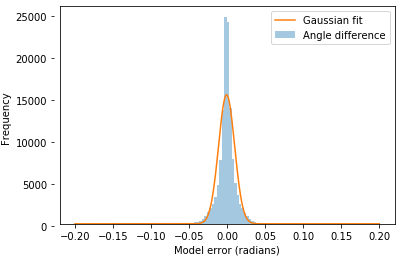

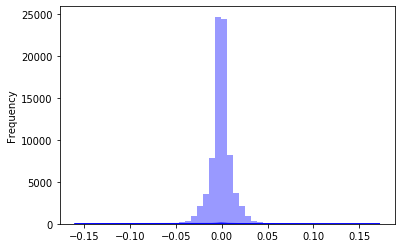

In [5]:
import seaborn as sns
from scipy import stats
mean_diff = diff.mean(axis=1)
x = np.linspace(-0.2, 0.2, 1000)
fit = stats.norm.fit(np.clip(mean_diff, -0.03, 0.03))
fig, ax = plt.subplots()
ax = sns.distplot(mean_diff, kde=False,norm_hist=True,bins=100, label='Angle difference');
ax.plot(x, stats.norm.pdf(x, *fit), label='Gaussian fit')
ax.legend() #awesome - fit[0] corresponds to mean and fit[1] correponds to sigma
ax.set_xlabel('Model error (radians)')
fig2, ax2 = plt.subplots()
sns.distplot(mean_diff, color='b');
sns.distplot(mean_diff, ax=ax2, kde=False, norm_hist=False, color='b');
ax.yaxis = ax2.yaxis
ax.set_ylabel('Frequency')
print(fit[1])

In [6]:
fig.savefig('RNN2_error.png')

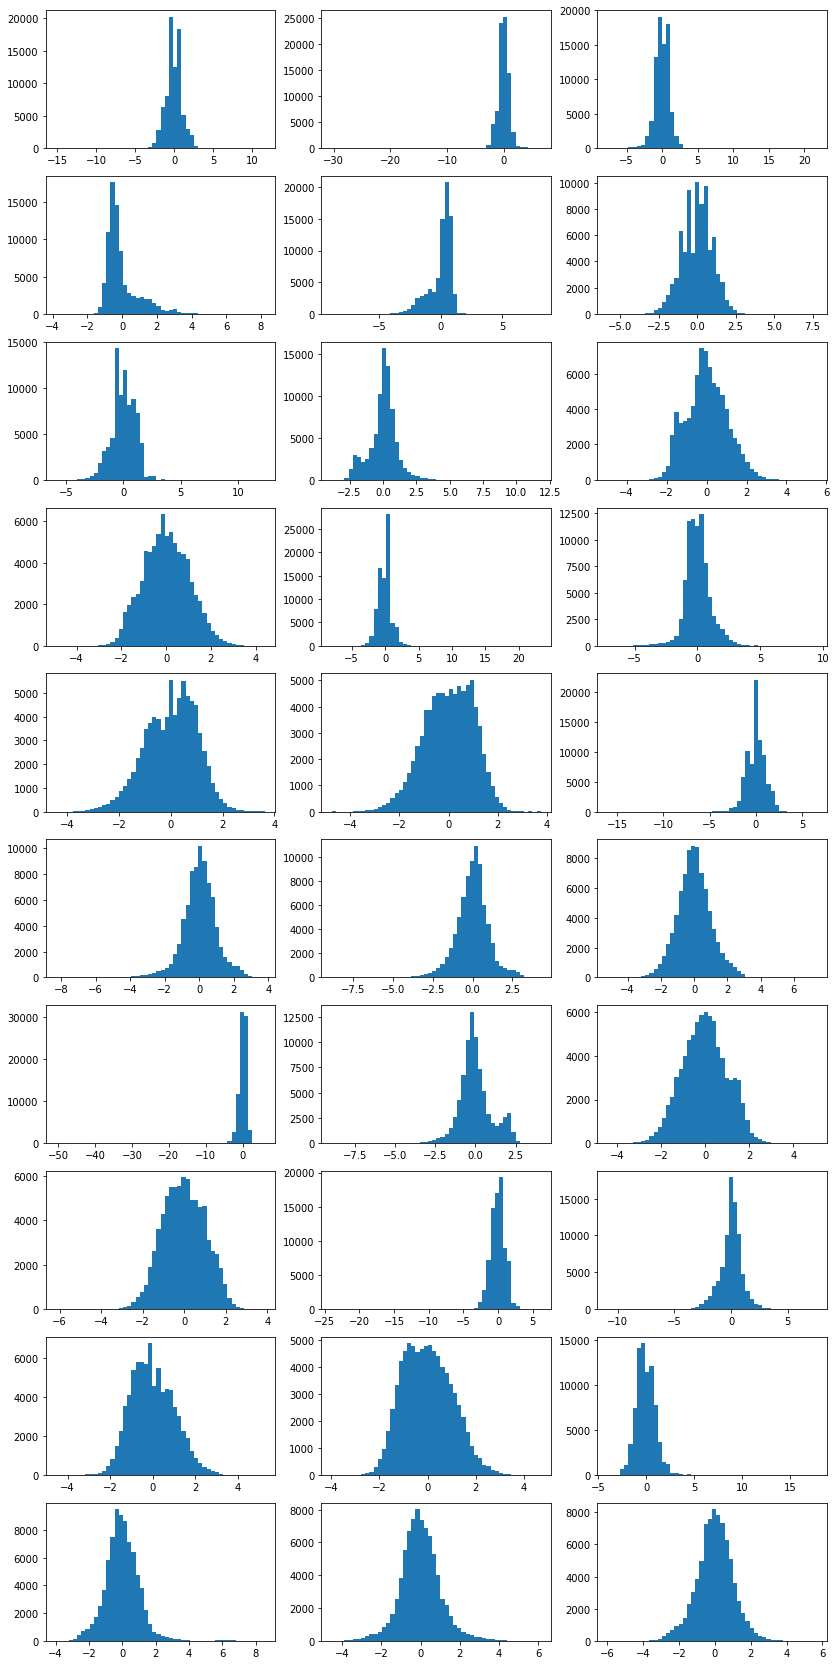

In [3]:
fig, axes = plt.subplots(10,3, figsize=(14,30))
for ang in range(num_angles):
    ax = axes[ang//3][ang%3]
    ax.hist(Xtrain[:,0,ang], bins=50)

In [5]:
#Xtrain = Xtrain[:]*(180/np.pi)
#Ytrain = Ytrain[:]*(180/np.pi)
#preds = preds*(180/np.pi)

In [37]:
os.chdir('/home/ishan/honors_thesis/')
Xscaler = load('Xscaler_val.bin')
Yscaler = load('Yscaler_val.bin')

In [40]:
preds_unnormed = Yscaler.inverse_transform(preds)
Y_unnormed = Yscaler.inverse_transform(Ytrain)

In [42]:
(preds - Ytrain).mean(), (preds_unnormed-Y_unnormed).mean()

(-0.004811706537666492, -0.000692584995738603)

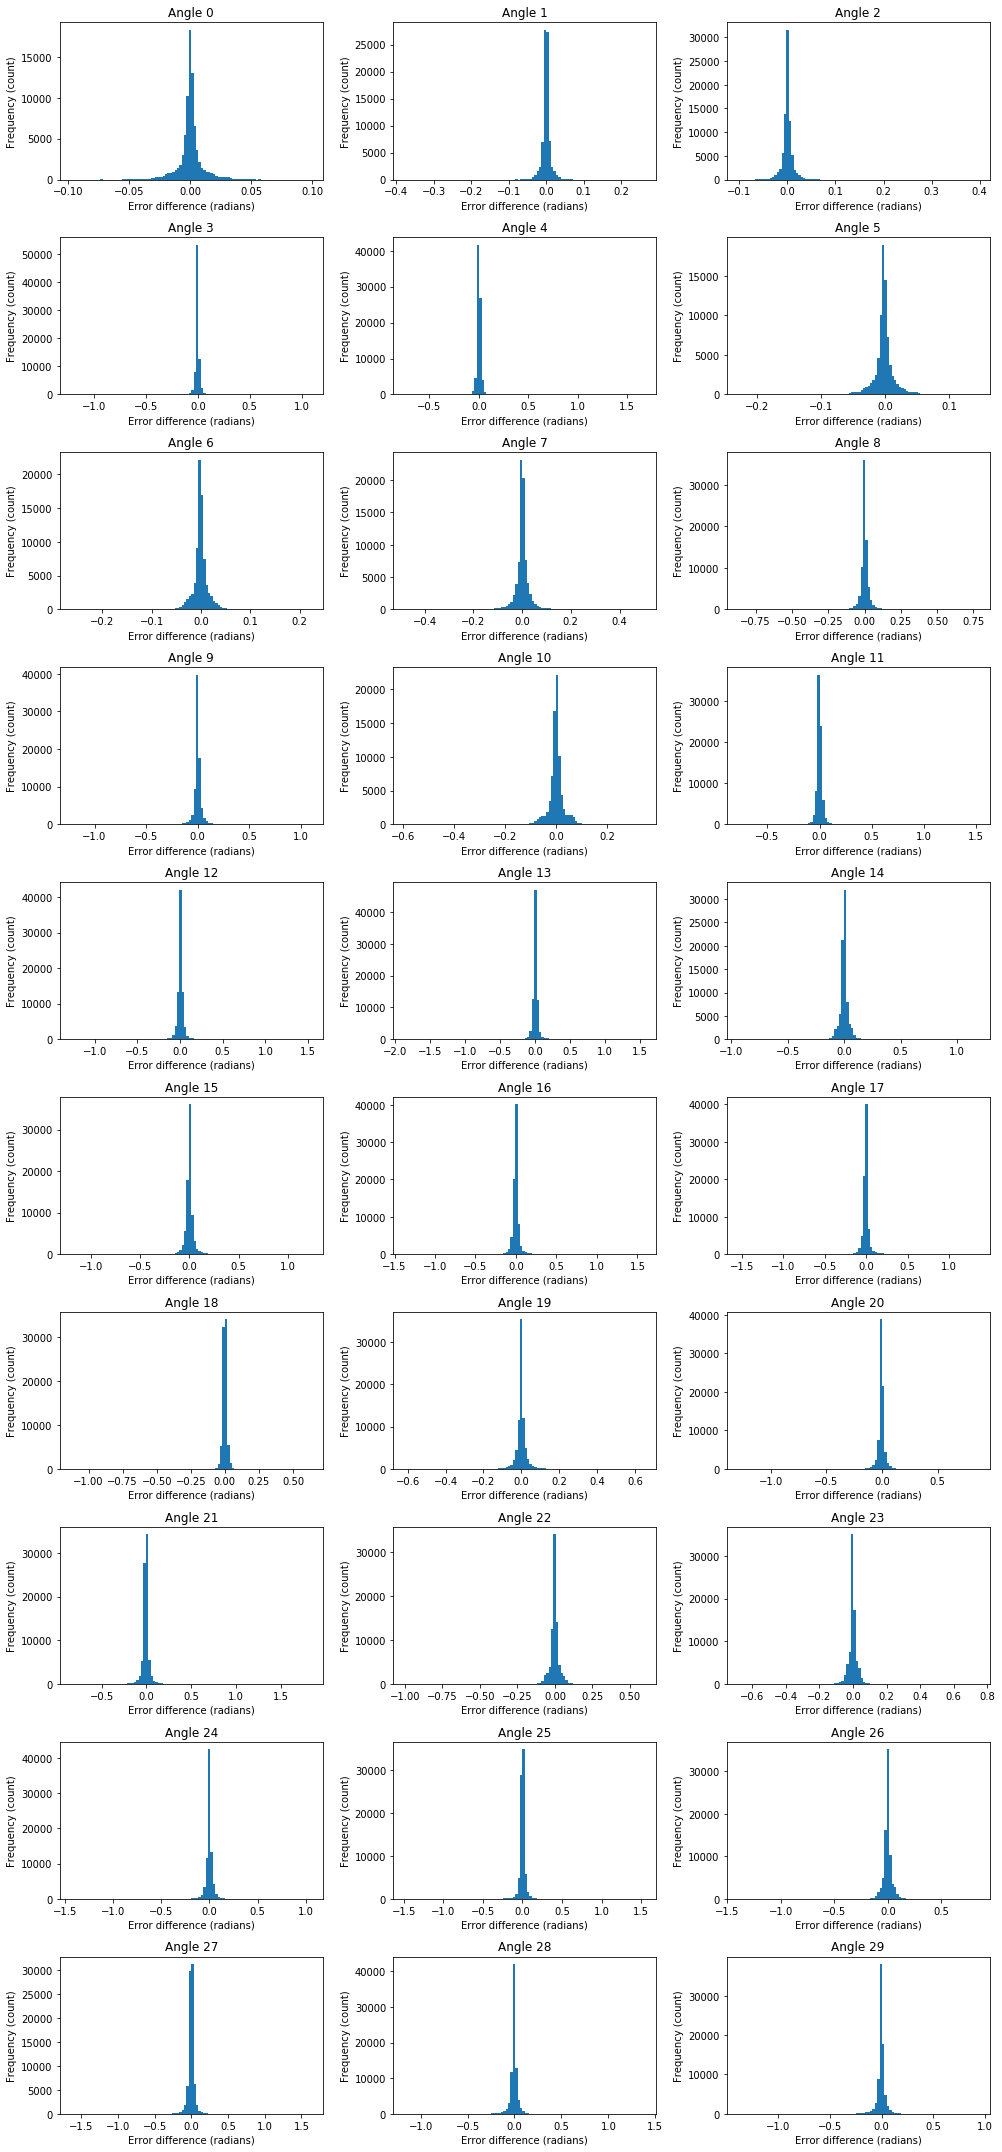

In [51]:
diff = (preds_unnormed[:,-1,:] - Y_unnormed[:,-1,:])

fig, axes = plt.subplots(10,3, figsize=(14,30))
for ang in range(num_angles):
    ax = axes[ang//3][ang%3]
    ax.hist(diff[:,ang], bins=100)
    ax.set_title('Angle {}'.format(ang))
    ax.set_ylabel('Frequency (count)')
    ax.set_xlabel('Error difference (radians)')
fig.tight_layout()
#fig.savefig('Model Error Distribution.png')

# 3 layer model validation

In [1]:
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt

os.environ['DISPLAY'] = 'localhost:10.0'
os.chdir('/home/ishan/honors_thesis/scripts')
from scripts import dlc_rnn, utils

from sklearn.metrics import mean_squared_error
from sklearn.externals.joblib import load

file = '/home/ishan/honors_thesis/github/models/fly_3layer_64Units_32Batchsize_Stateful_Model_0.hdf5'
model = dlc_rnn.LSTM3Dense1(mpath = file, gputouse=2)
np.random.seed(1)
num_angles=30

Using TensorFlow backend.
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflo

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


80000/80000 [==============================] - 24s 301us/step
-0.0037892856699383946 -0.0005886279743036949


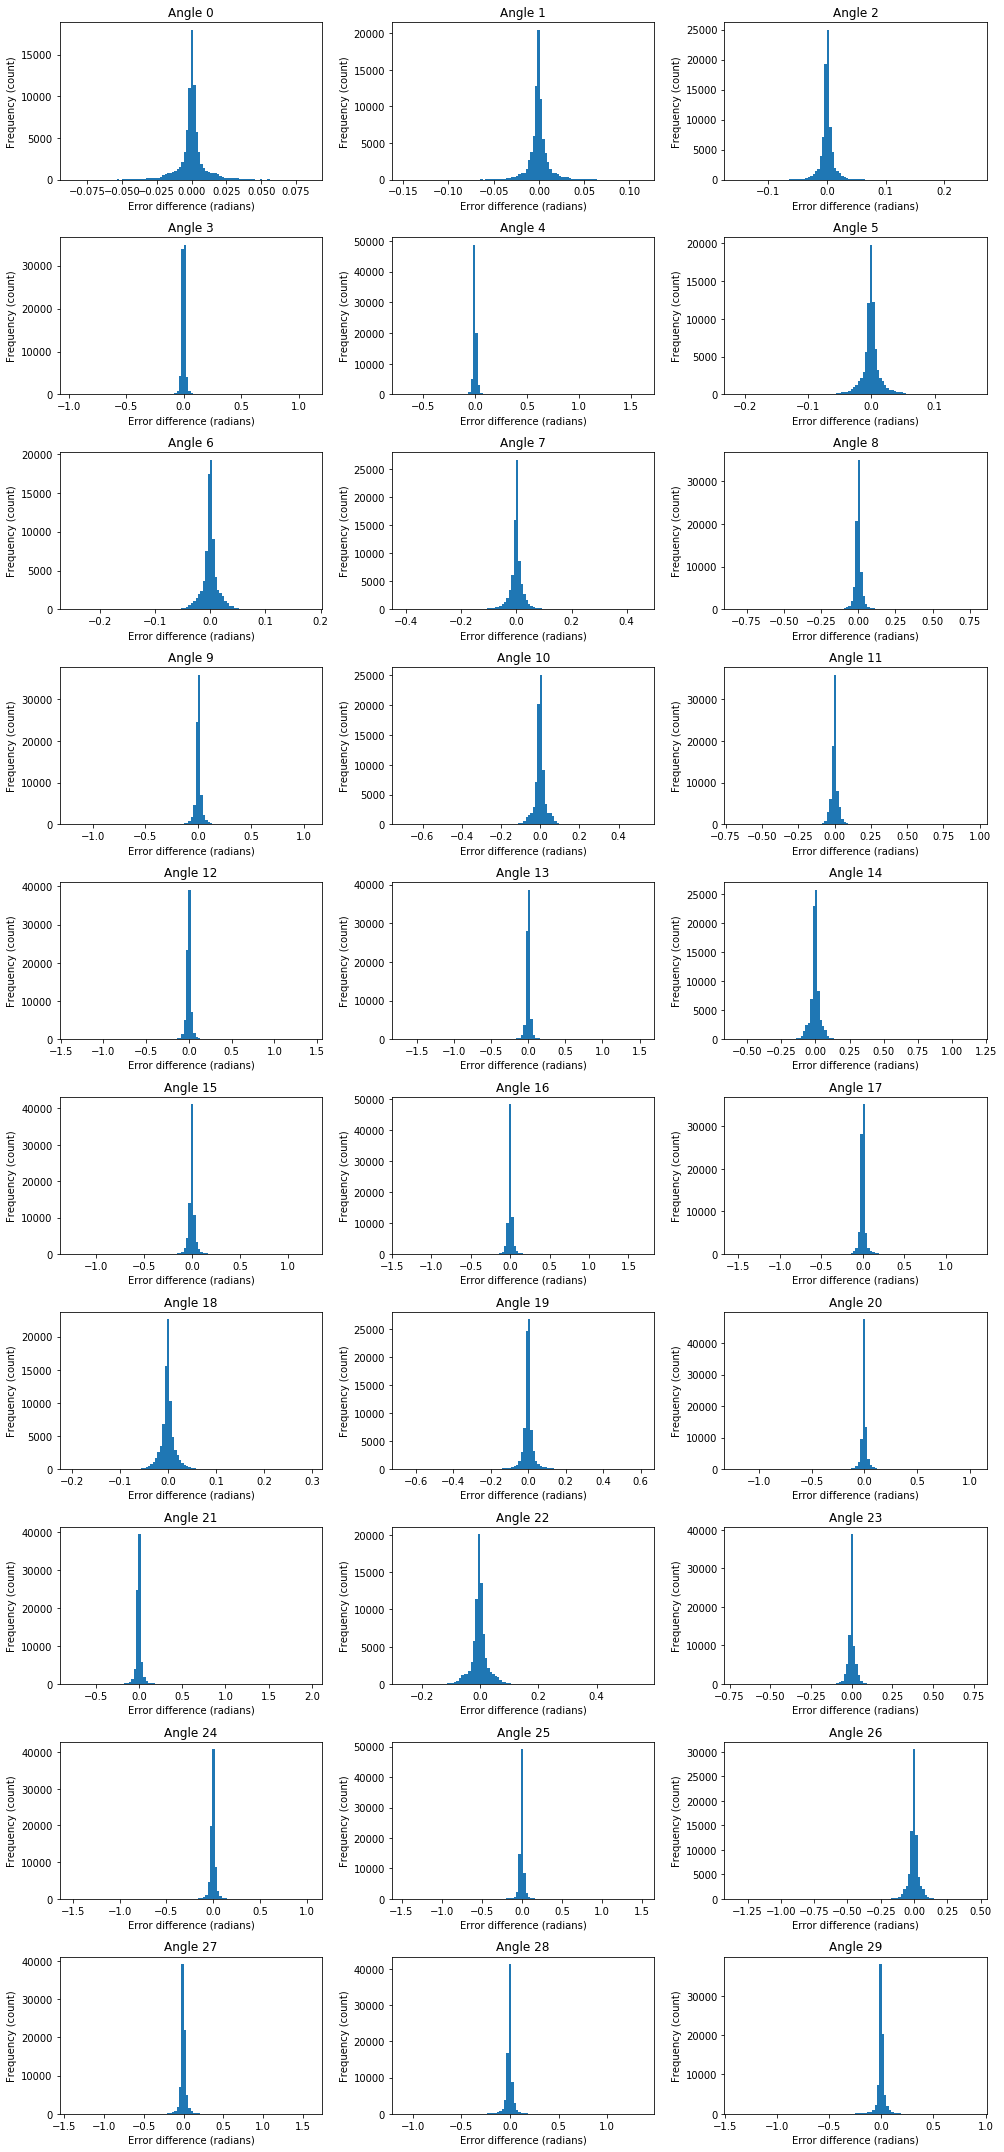

In [2]:
Xtrain = h5py.File('/home/ishan/honors_thesis/validation_set/Xtrain.h5')['joint_angles']
Ytrain = h5py.File('/home/ishan/honors_thesis/validation_set/Ytrain.h5')['joint_angles']
preds = model.model.predict(Xtrain, batch_size=32, verbose=1)

os.chdir('/home/ishan/honors_thesis/')
Xscaler = load('Xscaler_val.bin')
Yscaler = load('Yscaler_val.bin')

preds_unnormed = Yscaler.inverse_transform(preds)
Y_unnormed = Yscaler.inverse_transform(Ytrain)

print((preds - Ytrain).mean(), (preds_unnormed-Y_unnormed).mean())
diff = (preds_unnormed[:,-1,:] - Y_unnormed[:,-1,:])

fig, axes = plt.subplots(10,3, figsize=(14,30))
for ang in range(num_angles):
    ax = axes[ang//3][ang%3]
    ax.hist(diff[:,ang], bins=100)
    ax.set_title('Angle {}'.format(ang))
    ax.set_ylabel('Frequency (count)')
    ax.set_xlabel('Error difference (radians)')
fig.tight_layout()

In [3]:
mean_squared_error(preds_unnormed[:,-1,:], Y_unnormed[:,-1,:])

0.0015041650855096332

0.00990375873249267


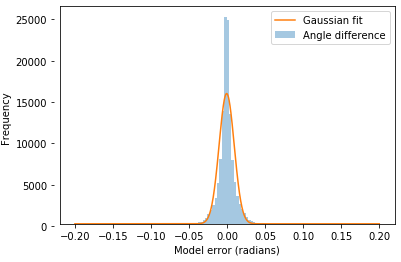

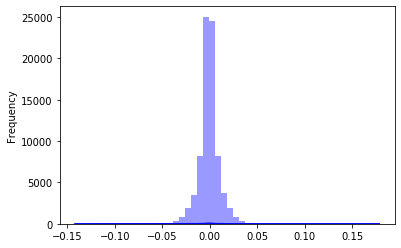

In [3]:
import seaborn as sns
from scipy import stats
x = np.linspace(-0.2,0.2,1000)
mean_diff = diff.mean(axis=1)
fit = stats.norm.fit(np.clip(mean_diff, -0.03, 0.03))
fig, ax = plt.subplots()
ax = sns.distplot(mean_diff, kde=False,norm_hist=True,bins=100, label='Angle difference');
ax.plot(x, stats.norm.pdf(x, *fit), label='Gaussian fit')
ax.legend() #awesome - fit[0] corresponds to mean and fit[1] correponds to sigma
ax.set_xlabel('Model error (radians)')
fig2, ax2 = plt.subplots()
sns.distplot(mean_diff, color='b');
sns.distplot(mean_diff, ax=ax2, kde=False, norm_hist=False, color='b');
ax.yaxis = ax2.yaxis
ax.set_ylabel('Frequency')
print(fit[1])

In [4]:
fig.savefig('RNN3_error.png')

In [13]:
from sklearn.metrics import mean_squared_error

mean_squared_error(preds_unnormed[:,-1,:], Y_unnormed[:,-1,:])

0.08206467717810824

### old code ... graph is kinda relevant (for not stateful rnn, it just kinda copies the X_train with a dampening factor)

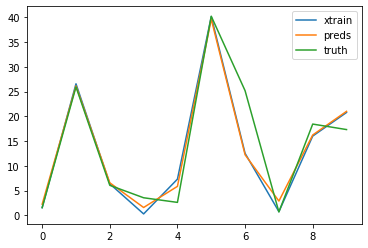

In [9]:
N = slice(0,10)
lag = slice(1)
angle = 20
plt.plot(Xtrain[N,lag,angle], label='xtrain')
plt.plot(preds[N,lag,angle], label='preds'), plt.plot(Ytrain[N,lag,angle], label='truth')
plt.legend()

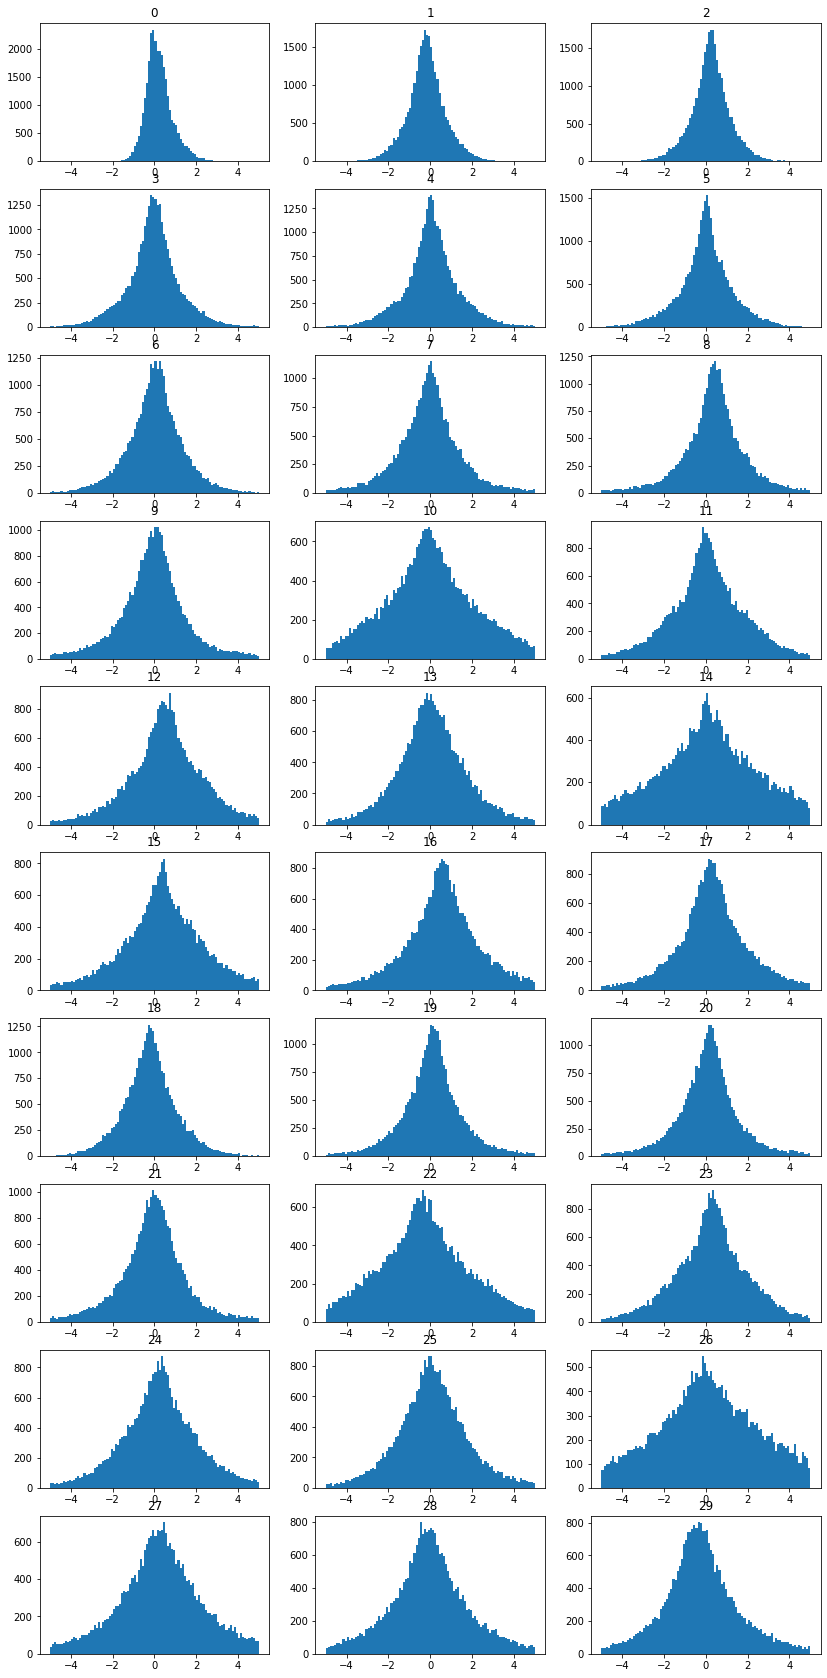

In [13]:
fig, axes = plt.subplots(10,3,figsize=(14,30))
for feat in range(30):
    ax = axes[feat//3][feat%3]
    ax.set_title(str(feat))
    _ = ax.hist((Ytrain-preds)[:,:,feat].flatten(), bins=100, range=(-5,5))